# 9 Plotting and Visualization

## 9.1 A brief matplotlib API primer

理解figure、
figure比作画板，axes/subplot比作画纸

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

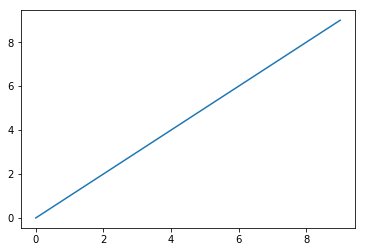

In [25]:
data = np.arange(10)
plt.plot(data)

### 9.1.1 Figures and subplots

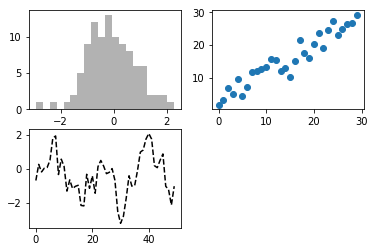

In [17]:
# create a new figure object
fig = plt.figure()

#plot 3 subplot
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

#issue plotting commands
plt.plot(np.random.randn(50).cumsum(),'k--')
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002903EFED908>,
      dtype=object)

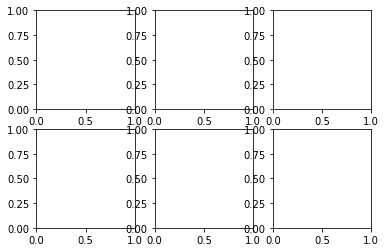

In [10]:
fig,axes=plt.subplots(2,3)
axes

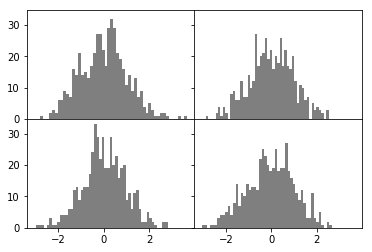

In [12]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

### 9.1.2 Adding legends

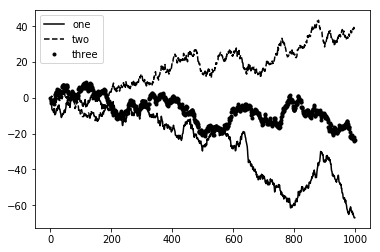

In [23]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')

### 9.1.3 Annotations and drawing on a subplot

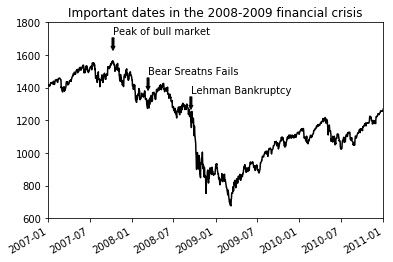

In [32]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('../examples/spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax,style='k-')

crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Sreatns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+75),
               xytext=(date,spx.asof(date)+225),
               arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
            horizontalalignment='left',verticalalignment='top')

# zoom in on 2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

# 9.1.4 Saving plots to file
plt.savefig('fig.png',dpi=400)

## 9.2 Plotting with pandas and seaborn

### 9.2.1 Line plots

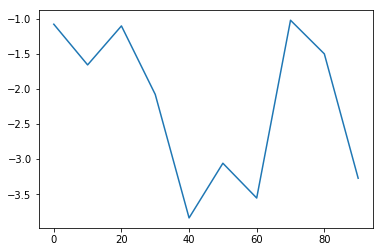

In [46]:
# plot series data
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

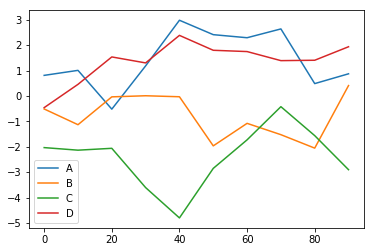

In [47]:
# plot dataframe data
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

### 9.2.2 Bar plots

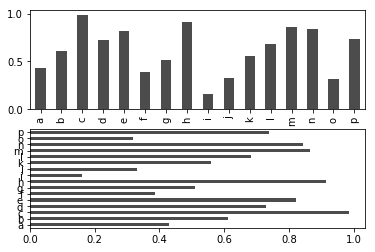

In [51]:
# polt series data
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

In [53]:
# plot dataframe data
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'],
                                 name='Genus'))
df

Genus,A,B,C,D
one,0.853906,0.335924,0.309800,0.398454
two,0.607818,0.167659,0.513012,0.077025
three,0.624155,0.235887,0.216625,0.709394
four,0.360026,0.906533,0.854315,0.834449
five,0.223589,0.449396,0.993669,0.041139
six,0.698025,0.827457,0.711870,0.283896


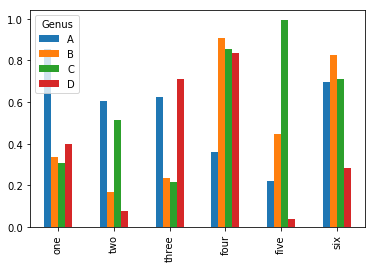

In [54]:
df.plot.bar()

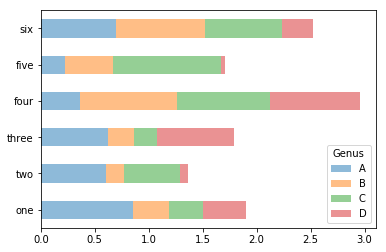

In [56]:
df.plot.barh(stacked=True,alpha=0.5)

In [57]:
# visualize a Series’s value frequency
tips = pd.read_csv('../examples/tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [59]:
# not many 1- and 6-person parties
party_counts = party_counts.loc[:,2:5]

#normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


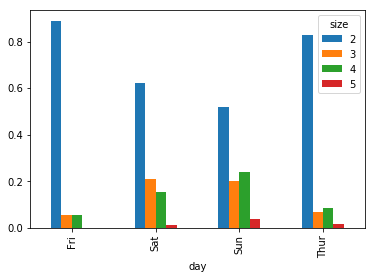

In [60]:
party_pcts.plot.bar()

In [61]:
# plot the tipping percentage by day with seaborn
import seaborn as sns
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


E:\install\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


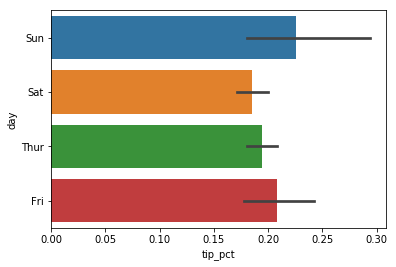

In [62]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

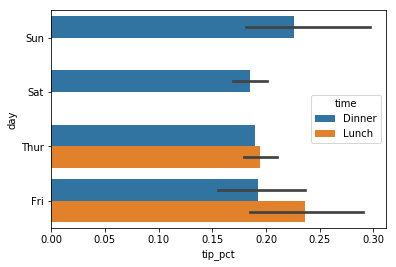

In [63]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

### 9.2.3 Histograms and density plots

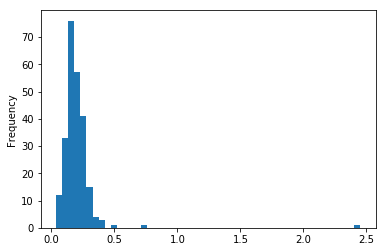

In [64]:
# plot a histogram of tip percentage of the total bill
tips['tip_pct'].plot.hist(bins=50)

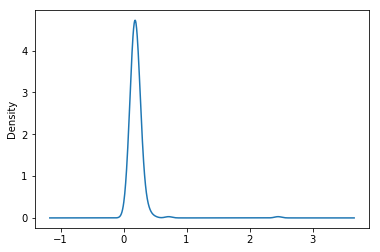

In [65]:
# make a density plot 
tips['tip_pct'].plot.density()

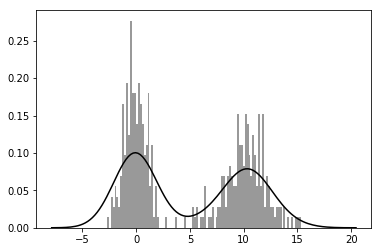

In [68]:
# make histogram and density plot with seaborn
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

### 9.2.4 Scatter or point plot

In [70]:
# make scatter plot
macro = pd.read_csv('../examples/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

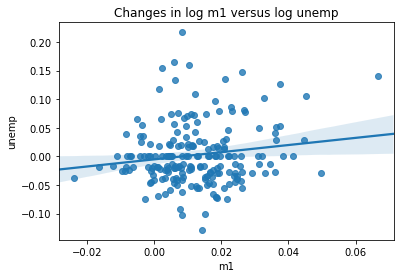

In [74]:
# make a scatter plot and fit a linear regression line
sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1','unemp'))

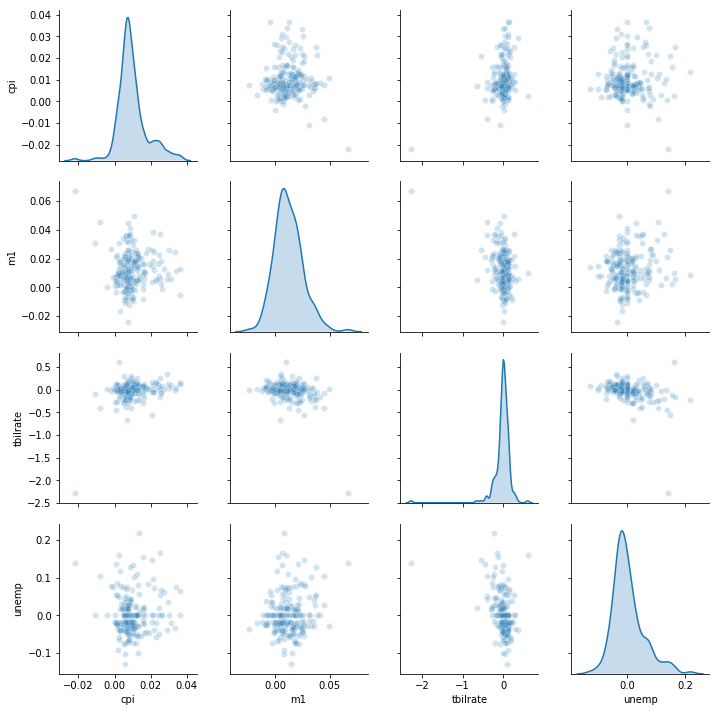

In [75]:
# make scatter plot matrix
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.2})

### 9.2.5 Facet grids and categorical data

In [84]:
# visualize data with one categorical variable
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
.....: kind='bar', data=tips[tips.tip_pct < 1])

SyntaxError: invalid syntax (<ipython-input-84-f5f26f803e8b>, line 3)

E:\install\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


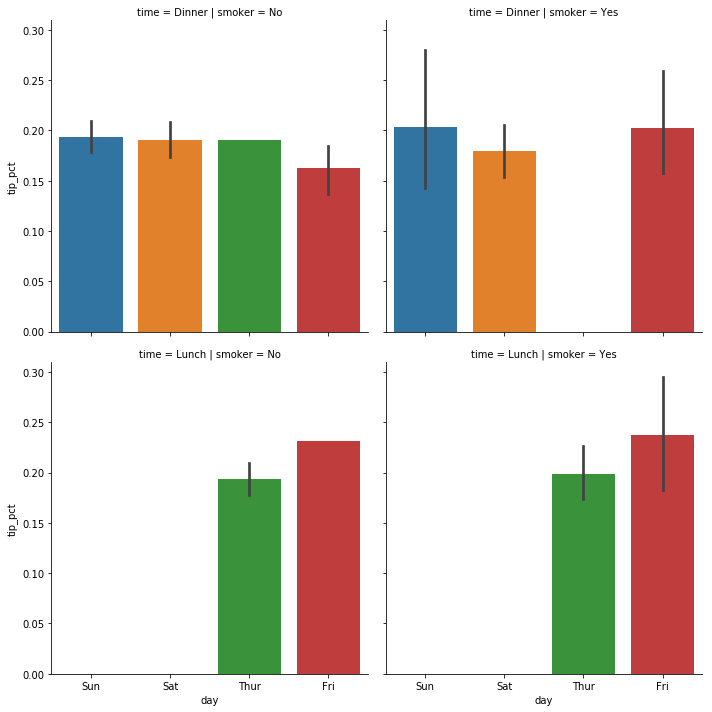

In [83]:
# expand the facet grid by adding one row per time value
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

E:\install\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


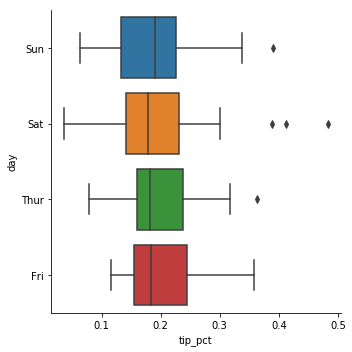

In [87]:
# make box plot
sns.factorplot(x='tip_pct',y='day',kind='box',data=tips[tips.tip_pct<0.5])